In [1]:
#Mounting Google Drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Changing the current working directory to the Google Drive
%cd /content/drive/My Drive/MLDL2024_project1-Enrico

/content/drive/My Drive/MLDL2024_project1-Enrico


In [3]:
!pip install -U fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=c57d37f5e1aa67ed3fe2acd79c2678208f8a53c3b456e8700c34267dc84a78d5
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=a6f88a0f3f1c59fe66399344b7a68bab7927c63356f437928ca63ac05adcdc7d
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath


In [4]:
#Importing the necessary libraries
import os
import torch
import numpy as np
from torch.utils.data import DataLoader
from datasets.cityscapes import CityscapesCustom
from models.deeplabv2.deeplabv2 import get_deeplab_v2
from models.bisenet.build_bisenet import BiSeNet
from train import train_model
from utils import test_latency_FPS, test_FLOPs_params, plot_miou_over_epochs

In [5]:
#Set device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

#Set the manual seeds
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

#Set training parameters
cityscapes_height, cityscapes_width = (512, 1024)
cityscapes_batch_size = 8

n_epochs = 50

Using device: cuda


In [6]:
#Create Dataloaders for Cityscapes
cityscapes_dir = os.path.dirname(os.getcwd()) + '/Cityscapes/Cityspaces/'

cityscapes_train_dataset = CityscapesCustom(cityscapes_dir, 'train', cityscapes_height, cityscapes_width)
cityscapes_test_dataset = CityscapesCustom(cityscapes_dir, 'val', cityscapes_height, cityscapes_width)

cityscapes_train_dataloader = DataLoader(cityscapes_train_dataset, cityscapes_batch_size, shuffle=True, num_workers=4)
cityscapes_test_dataloader = DataLoader(cityscapes_test_dataset, cityscapes_batch_size, shuffle=False, num_workers=4)

#Get the class names
class_names = cityscapes_test_dataset.get_class_names()

print(f'Cityscapes (Train): {len(cityscapes_train_dataset)} images, divided into {len(cityscapes_train_dataloader)} batches of size {cityscapes_train_dataloader.batch_size}')
print(f'Cityscapes (Test): {len(cityscapes_test_dataset)} images, divided into {len(cityscapes_test_dataloader)} batches of size {cityscapes_test_dataloader.batch_size}')

Cityscapes (Train): 1572 images, divided into 197 batches of size 8
Cityscapes (Test): 500 images, divided into 63 batches of size 8


Deeplab pretraining loading...



Epoch 1/50  42s]: Train mIoU=35.26%, Test mIoU=42.18%
road: 94.38% sidewalk: 61.80% building: 82.41% wall: 15.79% fence: 24.83% pole: 27.85% traffic light: 9.76% traffic sign: 35.75% vegetation: 84.18% terrain: 38.15% sky: 83.44% person: 55.91% rider: 18.71% car: 83.24% truck: 3.39% bus: 10.69% train: 10.67% motorcycle: 6.58% bicycle: 53.88% 


Epoch 2/50  32s]: Train mIoU=52.99%, Test mIoU=50.97%
road: 95.82% sidewalk: 69.34% building: 85.03% wall: 30.39% fence: 32.22% pole: 29.84% traffic light: 21.73% traffic sign: 44.10% vegetation: 85.83% terrain: 46.56% sky: 87.84% person: 59.67% rider: 31.49% car: 86.84% truck: 29.83% bus: 33.42% train: 10.89% motorcycle: 30.06% bicycle: 57.50% 


Epoch 3/50  32s]: Train mIoU=61.72%, Test mIoU=53.41%
road: 95.60% sidewalk: 69.16% building: 85.54% wall: 23.23% fence: 35.82% pole: 28.80% traffic light: 26.52% traffic sign: 47.92% vegetation: 86.31% terrain: 50.29% sky: 88.36% person: 61.01% rider: 33.01% car: 87.59% truck: 40.36% bus: 34.31% train: 29.77% motorcycle: 33.57% bicycle: 57.52% 


Epoch 4/50  32s]: Train mIoU=67.69%, Test mIoU=55.80%
road: 96.25% sidewalk: 72.06% building: 86.49% wall: 30.48% fence: 39.42% pole: 32.32% traffic light: 35.27% traffic sign: 50.10% vegetation: 86.64% terrain: 50.86% sky: 89.06% person: 62.57% rider: 36.36% car: 87.39% truck: 41.31% bus: 38.54% train: 27.81% motorcycle: 37.50% bicycle: 59.78% 


Epoch 5/50  32s]: Train mIoU=70.53%, Test mIoU=56.91%
road: 96.26% sidewalk: 72.26% building: 86.55% wall: 35.32% fence: 37.75% pole: 31.38% traffic light: 36.22% traffic sign: 51.10% vegetation: 87.23% terrain: 50.62% sky: 89.20% person: 62.75% rider: 34.71% car: 88.57% truck: 42.32% bus: 36.59% train: 44.98% motorcycle: 36.97% bicycle: 60.46% 


Epoch 6/50  32s]: Train mIoU=73.59%, Test mIoU=58.23%
road: 96.43% sidewalk: 73.44% building: 86.64% wall: 40.05% fence: 38.58% pole: 33.00% traffic light: 35.91% traffic sign: 52.59% vegetation: 87.23% terrain: 51.19% sky: 89.38% person: 63.67% rider: 39.97% car: 88.85% truck: 46.10% bus: 41.37% train: 45.32% motorcycle: 36.18% bicycle: 60.42% 


Epoch 7/50  32s]: Train mIoU=75.47%, Test mIoU=58.61%
road: 96.36% sidewalk: 72.82% building: 86.28% wall: 38.29% fence: 38.51% pole: 34.39% traffic light: 36.09% traffic sign: 52.13% vegetation: 87.06% terrain: 50.31% sky: 89.71% person: 63.60% rider: 36.57% car: 88.42% truck: 46.99% bus: 47.52% train: 51.94% motorcycle: 35.45% bicycle: 61.15% 


Epoch 8/50  32s]: Train mIoU=76.82%, Test mIoU=59.61%
road: 96.48% sidewalk: 73.65% building: 86.45% wall: 41.86% fence: 34.16% pole: 32.30% traffic light: 38.63% traffic sign: 53.81% vegetation: 86.11% terrain: 53.76% sky: 89.65% person: 64.08% rider: 38.60% car: 89.52% truck: 51.01% bus: 55.31% train: 50.64% motorcycle: 35.32% bicycle: 61.15% 


Epoch 9/50  32s]: Train mIoU=77.70%, Test mIoU=60.34%
road: 96.59% sidewalk: 74.33% building: 87.19% wall: 40.34% fence: 41.20% pole: 34.97% traffic light: 37.85% traffic sign: 54.11% vegetation: 87.49% terrain: 51.32% sky: 89.94% person: 64.76% rider: 41.53% car: 88.72% truck: 50.52% bus: 46.69% train: 56.44% motorcycle: 40.51% bicycle: 61.90% 


Epoch 10/50  32s]: Train mIoU=78.82%, Test mIoU=60.64%
road: 96.58% sidewalk: 74.43% building: 87.01% wall: 40.61% fence: 38.35% pole: 34.30% traffic light: 40.64% traffic sign: 54.56% vegetation: 87.69% terrain: 53.13% sky: 89.58% person: 65.25% rider: 40.43% car: 88.98% truck: 52.90% bus: 51.05% train: 52.73% motorcycle: 42.13% bicycle: 61.72% 


Epoch 11/50  32s]: Train mIoU=79.51%, Test mIoU=60.87%
road: 96.67% sidewalk: 74.85% building: 87.02% wall: 44.44% fence: 41.38% pole: 32.21% traffic light: 37.74% traffic sign: 53.87% vegetation: 87.77% terrain: 52.47% sky: 89.93% person: 64.50% rider: 38.24% car: 89.27% truck: 53.13% bus: 52.42% train: 56.59% motorcycle: 42.32% bicycle: 61.78% 


Epoch 12/50  32s]: Train mIoU=80.35%, Test mIoU=60.77%
road: 96.68% sidewalk: 74.89% building: 86.89% wall: 42.02% fence: 39.00% pole: 35.63% traffic light: 39.85% traffic sign: 55.12% vegetation: 87.69% terrain: 53.56% sky: 89.92% person: 64.74% rider: 42.32% car: 89.14% truck: 51.97% bus: 50.23% train: 54.75% motorcycle: 38.67% bicycle: 61.54% 


Epoch 13/50  32s]: Train mIoU=81.03%, Test mIoU=61.07%
road: 96.66% sidewalk: 74.84% building: 87.27% wall: 43.44% fence: 40.09% pole: 36.14% traffic light: 40.06% traffic sign: 54.54% vegetation: 87.75% terrain: 53.74% sky: 90.08% person: 65.52% rider: 43.69% car: 89.03% truck: 52.54% bus: 48.09% train: 53.20% motorcycle: 41.30% bicycle: 62.32% 


Epoch 14/50  31s]: Train mIoU=81.69%, Test mIoU=60.55%
road: 96.67% sidewalk: 74.75% building: 87.30% wall: 39.31% fence: 41.30% pole: 36.58% traffic light: 39.70% traffic sign: 55.08% vegetation: 87.71% terrain: 52.38% sky: 89.93% person: 65.64% rider: 42.94% car: 88.95% truck: 51.89% bus: 44.34% train: 54.89% motorcycle: 39.10% bicycle: 61.94% 


Epoch 15/50  32s]: Train mIoU=82.19%, Test mIoU=61.61%
road: 96.75% sidewalk: 75.57% building: 87.22% wall: 41.76% fence: 42.40% pole: 34.77% traffic light: 40.98% traffic sign: 55.50% vegetation: 87.79% terrain: 53.84% sky: 90.08% person: 65.42% rider: 43.11% car: 89.61% truck: 53.98% bus: 50.87% train: 54.81% motorcycle: 44.40% bicycle: 61.76% 


Epoch 16/50  32s]: Train mIoU=82.65%, Test mIoU=61.30%
road: 96.69% sidewalk: 75.31% building: 87.23% wall: 40.84% fence: 42.40% pole: 36.18% traffic light: 41.83% traffic sign: 55.87% vegetation: 87.86% terrain: 53.76% sky: 89.96% person: 65.01% rider: 42.26% car: 89.04% truck: 52.35% bus: 53.57% train: 53.03% motorcycle: 39.89% bicycle: 61.63% 


Epoch 17/50  32s]: Train mIoU=83.11%, Test mIoU=61.33%
road: 96.81% sidewalk: 75.90% building: 87.48% wall: 41.74% fence: 40.88% pole: 34.75% traffic light: 40.29% traffic sign: 55.26% vegetation: 87.66% terrain: 54.73% sky: 90.23% person: 65.60% rider: 41.25% car: 89.23% truck: 53.43% bus: 50.64% train: 57.46% motorcycle: 40.17% bicycle: 61.66% 


Epoch 18/50  31s]: Train mIoU=83.64%, Test mIoU=61.41%
road: 96.68% sidewalk: 75.37% building: 87.32% wall: 40.45% fence: 41.49% pole: 37.13% traffic light: 41.20% traffic sign: 55.40% vegetation: 87.84% terrain: 53.18% sky: 90.04% person: 65.59% rider: 43.14% car: 89.33% truck: 53.95% bus: 51.62% train: 53.24% motorcycle: 41.71% bicycle: 62.03% 


Epoch 19/50  31s]: Train mIoU=84.10%, Test mIoU=61.36%
road: 96.74% sidewalk: 75.14% building: 87.29% wall: 41.91% fence: 40.44% pole: 36.58% traffic light: 41.87% traffic sign: 55.97% vegetation: 87.95% terrain: 52.57% sky: 90.13% person: 65.93% rider: 42.53% car: 89.45% truck: 54.19% bus: 50.80% train: 53.60% motorcycle: 40.28% bicycle: 62.40% 


Epoch 20/50  31s]: Train mIoU=84.32%, Test mIoU=61.14%
road: 96.77% sidewalk: 75.51% building: 87.35% wall: 43.06% fence: 41.00% pole: 35.66% traffic light: 40.15% traffic sign: 55.94% vegetation: 87.96% terrain: 52.19% sky: 90.29% person: 65.66% rider: 40.52% car: 89.72% truck: 53.22% bus: 51.92% train: 54.44% motorcycle: 38.84% bicycle: 61.42% 


Epoch 21/50  32s]: Train mIoU=84.69%, Test mIoU=61.33%
road: 96.84% sidewalk: 75.80% building: 87.49% wall: 44.68% fence: 41.61% pole: 36.82% traffic light: 41.51% traffic sign: 55.51% vegetation: 87.71% terrain: 52.78% sky: 90.25% person: 65.70% rider: 42.48% car: 89.22% truck: 53.50% bus: 49.07% train: 53.15% motorcycle: 39.03% bicycle: 62.18% 


Epoch 22/50  32s]: Train mIoU=85.11%, Test mIoU=61.71%
road: 96.81% sidewalk: 76.07% building: 87.47% wall: 41.15% fence: 41.75% pole: 37.09% traffic light: 41.15% traffic sign: 56.08% vegetation: 87.86% terrain: 55.21% sky: 90.27% person: 65.49% rider: 41.00% car: 89.47% truck: 53.62% bus: 55.03% train: 54.42% motorcycle: 40.68% bicycle: 61.96% 


Epoch 23/50  31s]: Train mIoU=85.37%, Test mIoU=61.71%
road: 96.79% sidewalk: 75.61% building: 87.42% wall: 43.00% fence: 41.69% pole: 35.40% traffic light: 41.08% traffic sign: 55.44% vegetation: 87.77% terrain: 51.73% sky: 90.32% person: 66.24% rider: 44.69% car: 89.88% truck: 53.19% bus: 54.80% train: 53.55% motorcycle: 41.89% bicycle: 62.01% 


Epoch 24/50  31s]: Train mIoU=85.55%, Test mIoU=60.68%
road: 96.66% sidewalk: 75.15% building: 87.15% wall: 34.74% fence: 38.81% pole: 37.08% traffic light: 41.40% traffic sign: 55.50% vegetation: 87.76% terrain: 55.04% sky: 90.13% person: 65.07% rider: 43.93% car: 88.97% truck: 53.31% bus: 48.91% train: 51.71% motorcycle: 39.97% bicycle: 61.59% 


Epoch 25/50  31s]: Train mIoU=85.81%, Test mIoU=61.34%
road: 96.71% sidewalk: 75.31% building: 87.32% wall: 40.01% fence: 40.88% pole: 37.37% traffic light: 42.52% traffic sign: 56.09% vegetation: 87.90% terrain: 53.75% sky: 90.33% person: 65.83% rider: 43.49% car: 89.22% truck: 52.82% bus: 52.45% train: 53.28% motorcycle: 38.45% bicycle: 61.76% 


Epoch 26/50  32s]: Train mIoU=86.22%, Test mIoU=61.76%
road: 96.75% sidewalk: 75.81% building: 87.38% wall: 41.01% fence: 42.67% pole: 37.34% traffic light: 41.28% traffic sign: 55.77% vegetation: 87.79% terrain: 54.11% sky: 90.32% person: 65.75% rider: 43.54% car: 89.60% truck: 53.95% bus: 55.06% train: 52.90% motorcycle: 40.51% bicycle: 61.85% 


Epoch 27/50  32s]: Train mIoU=86.47%, Test mIoU=61.82%
road: 96.77% sidewalk: 75.63% building: 87.34% wall: 42.80% fence: 42.36% pole: 36.87% traffic light: 41.28% traffic sign: 55.92% vegetation: 87.98% terrain: 53.80% sky: 90.06% person: 65.77% rider: 43.21% car: 89.67% truck: 53.09% bus: 53.99% train: 53.66% motorcycle: 42.27% bicycle: 62.21% 


Epoch 28/50  32s]: Train mIoU=86.73%, Test mIoU=61.24%
road: 96.85% sidewalk: 76.09% building: 87.16% wall: 43.02% fence: 40.20% pole: 37.26% traffic light: 40.19% traffic sign: 55.59% vegetation: 87.88% terrain: 53.76% sky: 90.44% person: 66.10% rider: 42.07% car: 89.49% truck: 52.79% bus: 50.83% train: 52.72% motorcycle: 38.76% bicycle: 62.33% 


Epoch 29/50  32s]: Train mIoU=86.95%, Test mIoU=61.35%
road: 96.86% sidewalk: 75.96% building: 87.31% wall: 42.58% fence: 41.13% pole: 35.64% traffic light: 40.32% traffic sign: 55.38% vegetation: 87.96% terrain: 54.88% sky: 90.28% person: 65.92% rider: 42.85% car: 89.45% truck: 52.87% bus: 51.49% train: 53.99% motorcycle: 38.87% bicycle: 61.85% 


Epoch 30/50  32s]: Train mIoU=87.09%, Test mIoU=61.48%
road: 96.82% sidewalk: 76.00% building: 87.21% wall: 41.63% fence: 40.11% pole: 37.49% traffic light: 42.16% traffic sign: 56.10% vegetation: 87.89% terrain: 54.39% sky: 90.30% person: 65.93% rider: 43.09% car: 89.80% truck: 53.04% bus: 52.15% train: 50.99% motorcycle: 40.94% bicycle: 62.16% 


Epoch 31/50  31s]: Train mIoU=87.31%, Test mIoU=61.36%
road: 96.84% sidewalk: 76.18% building: 87.34% wall: 41.10% fence: 42.14% pole: 37.49% traffic light: 41.85% traffic sign: 56.26% vegetation: 87.98% terrain: 55.30% sky: 90.31% person: 65.99% rider: 43.72% car: 90.11% truck: 49.88% bus: 47.68% train: 51.91% motorcycle: 41.45% bicycle: 62.24% 


Epoch 32/50  31s]: Train mIoU=87.61%, Test mIoU=61.58%
road: 96.87% sidewalk: 76.23% building: 87.43% wall: 40.20% fence: 41.43% pole: 38.56% traffic light: 42.18% traffic sign: 56.19% vegetation: 87.85% terrain: 54.00% sky: 90.21% person: 65.96% rider: 44.15% car: 89.52% truck: 52.62% bus: 51.94% train: 51.84% motorcycle: 40.75% bicycle: 62.10% 


Epoch 33/50  31s]: Train mIoU=87.75%, Test mIoU=61.15%
road: 96.79% sidewalk: 75.66% building: 87.43% wall: 38.93% fence: 40.90% pole: 37.50% traffic light: 41.49% traffic sign: 56.06% vegetation: 87.90% terrain: 53.39% sky: 90.16% person: 66.14% rider: 42.31% car: 89.22% truck: 51.79% bus: 47.98% train: 52.81% motorcycle: 42.91% bicycle: 62.46% 


Epoch 34/50  32s]: Train mIoU=87.87%, Test mIoU=61.50%
road: 96.89% sidewalk: 75.95% building: 87.45% wall: 41.67% fence: 41.56% pole: 38.11% traffic light: 42.62% traffic sign: 56.38% vegetation: 87.96% terrain: 53.56% sky: 90.21% person: 66.03% rider: 43.12% car: 89.72% truck: 53.27% bus: 49.15% train: 50.91% motorcycle: 42.00% bicycle: 62.02% 


Epoch 35/50  31s]: Train mIoU=88.07%, Test mIoU=61.47%
road: 96.89% sidewalk: 76.33% building: 87.06% wall: 43.70% fence: 37.64% pole: 37.01% traffic light: 41.47% traffic sign: 56.10% vegetation: 87.87% terrain: 54.29% sky: 90.30% person: 65.95% rider: 44.53% car: 89.78% truck: 53.78% bus: 53.50% train: 50.34% motorcycle: 39.85% bicycle: 61.61% 


Epoch 36/50  31s]: Train mIoU=88.22%, Test mIoU=61.73%
road: 96.92% sidewalk: 76.40% building: 87.45% wall: 42.00% fence: 42.51% pole: 36.83% traffic light: 41.64% traffic sign: 55.80% vegetation: 87.84% terrain: 54.39% sky: 90.44% person: 66.04% rider: 42.26% car: 89.79% truck: 54.01% bus: 53.99% train: 51.70% motorcycle: 40.60% bicycle: 62.30% 


Epoch 37/50  31s]: Train mIoU=88.48%, Test mIoU=60.15%
road: 96.80% sidewalk: 75.88% building: 87.16% wall: 37.35% fence: 37.32% pole: 36.50% traffic light: 39.87% traffic sign: 56.50% vegetation: 87.53% terrain: 54.85% sky: 90.06% person: 65.33% rider: 38.93% car: 89.54% truck: 51.04% bus: 47.72% train: 50.97% motorcycle: 37.14% bicycle: 62.39% 


Epoch 38/50  31s]: Train mIoU=88.61%, Test mIoU=61.47%
road: 96.76% sidewalk: 75.63% building: 87.31% wall: 41.93% fence: 40.47% pole: 37.64% traffic light: 41.06% traffic sign: 56.55% vegetation: 87.92% terrain: 53.45% sky: 90.22% person: 65.83% rider: 41.60% car: 89.75% truck: 52.83% bus: 51.69% train: 53.26% motorcycle: 41.51% bicycle: 62.54% 


Epoch 39/50  31s]: Train mIoU=88.66%, Test mIoU=61.37%
road: 96.92% sidewalk: 76.28% building: 87.43% wall: 40.17% fence: 40.99% pole: 37.70% traffic light: 41.27% traffic sign: 56.19% vegetation: 88.00% terrain: 54.55% sky: 90.38% person: 66.48% rider: 43.71% car: 89.74% truck: 51.96% bus: 49.49% train: 50.68% motorcycle: 41.54% bicycle: 62.59% 


Epoch 40/50  32s]: Train mIoU=88.85%, Test mIoU=61.48%
road: 96.93% sidewalk: 76.35% building: 87.38% wall: 42.90% fence: 41.03% pole: 38.26% traffic light: 39.67% traffic sign: 57.15% vegetation: 87.91% terrain: 54.15% sky: 90.33% person: 66.01% rider: 42.33% car: 89.84% truck: 54.11% bus: 53.23% train: 51.55% motorcycle: 38.01% bicycle: 61.01% 


Epoch 41/50  31s]: Train mIoU=88.86%, Test mIoU=61.77%
road: 96.90% sidewalk: 76.49% building: 87.57% wall: 42.34% fence: 41.30% pole: 37.38% traffic light: 41.41% traffic sign: 56.67% vegetation: 87.97% terrain: 55.21% sky: 90.37% person: 66.24% rider: 44.49% car: 89.61% truck: 53.53% bus: 51.31% train: 51.36% motorcycle: 40.87% bicycle: 62.57% 


Epoch 42/50  31s]: Train mIoU=89.03%, Test mIoU=61.54%
road: 96.96% sidewalk: 76.65% building: 87.59% wall: 42.78% fence: 41.51% pole: 37.46% traffic light: 40.86% traffic sign: 56.46% vegetation: 87.95% terrain: 54.51% sky: 90.29% person: 65.82% rider: 38.79% car: 90.10% truck: 52.83% bus: 58.66% train: 50.20% motorcycle: 37.62% bicycle: 62.19% 


Epoch 43/50  31s]: Train mIoU=89.18%, Test mIoU=61.55%
road: 96.90% sidewalk: 76.43% building: 87.48% wall: 41.61% fence: 41.38% pole: 38.43% traffic light: 41.97% traffic sign: 56.26% vegetation: 87.88% terrain: 55.67% sky: 90.43% person: 66.11% rider: 43.01% car: 89.87% truck: 51.87% bus: 49.53% train: 51.97% motorcycle: 39.92% bicycle: 62.65% 


Epoch 44/50  32s]: Train mIoU=89.36%, Test mIoU=61.43%
road: 96.88% sidewalk: 76.32% building: 87.53% wall: 41.73% fence: 41.73% pole: 37.67% traffic light: 42.55% traffic sign: 56.75% vegetation: 87.75% terrain: 53.87% sky: 90.48% person: 66.10% rider: 41.73% car: 89.52% truck: 54.01% bus: 48.34% train: 52.31% motorcycle: 39.55% bicycle: 62.39% 


Epoch 45/50  32s]: Train mIoU=89.46%, Test mIoU=61.26%
road: 96.87% sidewalk: 76.42% building: 87.08% wall: 41.01% fence: 40.63% pole: 38.27% traffic light: 42.50% traffic sign: 56.61% vegetation: 87.96% terrain: 54.70% sky: 90.41% person: 65.19% rider: 39.57% car: 89.80% truck: 53.30% bus: 52.09% train: 50.61% motorcycle: 38.79% bicycle: 62.13% 


Epoch 46/50  32s]: Train mIoU=89.72%, Test mIoU=61.70%
road: 96.96% sidewalk: 76.54% building: 87.38% wall: 41.36% fence: 40.64% pole: 37.80% traffic light: 41.76% traffic sign: 56.55% vegetation: 88.01% terrain: 55.30% sky: 90.39% person: 66.16% rider: 43.57% car: 89.82% truck: 52.65% bus: 52.63% train: 50.94% motorcycle: 41.50% bicycle: 62.42% 


Epoch 47/50  32s]: Train mIoU=89.85%, Test mIoU=61.51%
road: 96.86% sidewalk: 76.00% building: 87.47% wall: 39.86% fence: 41.91% pole: 38.93% traffic light: 41.68% traffic sign: 56.44% vegetation: 88.06% terrain: 54.16% sky: 90.35% person: 66.71% rider: 45.58% car: 89.63% truck: 52.02% bus: 48.65% train: 50.87% motorcycle: 41.53% bicycle: 61.98% 


Epoch 48/50  32s]: Train mIoU=89.88%, Test mIoU=61.48%
road: 96.95% sidewalk: 76.64% building: 87.47% wall: 42.30% fence: 40.59% pole: 36.70% traffic light: 39.52% traffic sign: 56.52% vegetation: 87.93% terrain: 54.18% sky: 90.41% person: 65.97% rider: 44.16% car: 89.70% truck: 52.15% bus: 50.36% train: 51.58% motorcycle: 42.18% bicycle: 62.84% 


Epoch 49/50  33s]: Train mIoU=89.94%, Test mIoU=62.10%
road: 96.91% sidewalk: 76.55% building: 87.53% wall: 43.49% fence: 42.57% pole: 37.56% traffic light: 42.83% traffic sign: 56.95% vegetation: 88.06% terrain: 55.13% sky: 90.30% person: 66.67% rider: 43.42% car: 89.77% truck: 54.14% bus: 54.10% train: 51.19% motorcycle: 40.52% bicycle: 62.13% 


Epoch 50/50  32s]: Train mIoU=90.00%, Test mIoU=61.82%
road: 96.93% sidewalk: 76.61% building: 87.37% wall: 41.35% fence: 39.97% pole: 37.93% traffic light: 40.91% traffic sign: 56.87% vegetation: 88.00% terrain: 54.56% sky: 90.45% person: 66.48% rider: 43.30% car: 90.17% truck: 53.35% bus: 54.69% train: 51.85% motorcycle: 41.19% bicycle: 62.55% 
Best mIoU=62.10% at epoch 49
road: 96.91% sidewalk: 76.55% building: 87.53% wall: 43.49% fence: 42.57% pole: 37.56% traffic light: 42.83% traffic sign: 56.95% vegetation: 88.06% terrain: 55.13% sky: 90.30% person: 66.67% rider: 43.42% car: 89.77% truck: 54.14% bus: 54.10% train: 51.19% motorcycle: 40.52% bicycle: 62.13% 

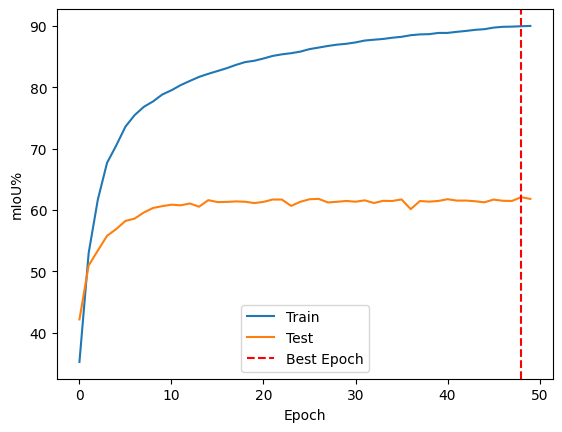

In [8]:
#Testing Classic semantic segmentation network

#Set up the model with the pretrained weights
DeepLabV2_model = get_deeplab_v2().to(device)

#Set up the loss function and the optimizer
DeepLabV2_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
DeepLabV2_optimizer = torch.optim.SGD(DeepLabV2_model.parameters(), lr=1e-2, momentum=0.9, weight_decay=5e-4)

#Test latency and FPS
#print(test_latency_FPS(DeepLabV2_model, device, cityscapes_height, cityscapes_width))

#Test FLOPs and number of parameters
#print(test_FLOPs_params(DeepLabV2_model, device, cityscapes_height, cityscapes_width))

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(DeepLabV2_model, DeepLabV2_criterion, DeepLabV2_optimizer,
            cityscapes_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs, model_name='DeepLabV2')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch, model_name='DeepLabV2')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 225MB/s]



Epoch 1/50  15s]: Train mIoU=28.09%, Test mIoU=33.70%
road: 92.99% sidewalk: 53.50% building: 77.55% wall: 7.72% fence: 21.90% pole: 0.10% traffic light: 0.00% traffic sign: 13.20% vegetation: 80.16% terrain: 39.55% sky: 82.31% person: 38.10% rider: 1.24% car: 77.16% truck: 11.39% bus: 2.80% train: 0.00% motorcycle: 0.00% bicycle: 40.73% 


Epoch 2/50  13s]: Train mIoU=39.69%, Test mIoU=38.00%
road: 93.84% sidewalk: 59.80% building: 78.64% wall: 14.73% fence: 19.49% pole: 7.69% traffic light: 0.00% traffic sign: 22.55% vegetation: 81.86% terrain: 46.03% sky: 85.42% person: 45.28% rider: 4.43% car: 80.47% truck: 24.77% bus: 16.63% train: 0.00% motorcycle: 0.23% bicycle: 40.21% 


Epoch 3/50  14s]: Train mIoU=47.68%, Test mIoU=42.36%
road: 94.79% sidewalk: 64.23% building: 82.02% wall: 18.46% fence: 26.79% pole: 13.40% traffic light: 2.25% traffic sign: 34.09% vegetation: 81.13% terrain: 47.72% sky: 88.81% person: 49.85% rider: 9.02% car: 81.43% truck: 25.77% bus: 25.33% train: 5.63% motorcycle: 5.20% bicycle: 48.82% 


Epoch 4/50  13s]: Train mIoU=56.30%, Test mIoU=46.02%
road: 94.72% sidewalk: 65.67% building: 83.04% wall: 16.79% fence: 27.49% pole: 17.15% traffic light: 12.09% traffic sign: 33.58% vegetation: 84.82% terrain: 48.82% sky: 87.78% person: 51.69% rider: 15.61% car: 83.26% truck: 36.49% bus: 21.20% train: 28.31% motorcycle: 16.90% bicycle: 48.96% 


Epoch 5/50  13s]: Train mIoU=61.52%, Test mIoU=48.30%
road: 95.29% sidewalk: 67.85% building: 84.08% wall: 36.43% fence: 29.25% pole: 23.63% traffic light: 14.35% traffic sign: 37.88% vegetation: 85.43% terrain: 50.97% sky: 89.19% person: 53.40% rider: 20.06% car: 83.87% truck: 30.34% bus: 41.71% train: 12.56% motorcycle: 9.23% bicycle: 52.13% 


Epoch 6/50  13s]: Train mIoU=66.13%, Test mIoU=47.97%
road: 95.23% sidewalk: 67.36% building: 84.09% wall: 28.41% fence: 30.40% pole: 22.98% traffic light: 13.05% traffic sign: 38.93% vegetation: 85.41% terrain: 47.33% sky: 89.19% person: 52.18% rider: 16.38% car: 83.54% truck: 27.28% bus: 27.31% train: 26.13% motorcycle: 24.92% bicycle: 51.29% 


Epoch 7/50  13s]: Train mIoU=68.21%, Test mIoU=50.87%
road: 95.49% sidewalk: 69.14% building: 84.57% wall: 31.34% fence: 33.08% pole: 27.09% traffic light: 19.79% traffic sign: 40.95% vegetation: 85.47% terrain: 46.67% sky: 89.36% person: 55.92% rider: 25.11% car: 84.82% truck: 33.21% bus: 29.23% train: 36.91% motorcycle: 25.08% bicycle: 53.30% 


Epoch 8/50  13s]: Train mIoU=70.51%, Test mIoU=52.07%
road: 95.61% sidewalk: 69.68% building: 83.72% wall: 34.49% fence: 33.23% pole: 29.18% traffic light: 23.29% traffic sign: 42.63% vegetation: 85.61% terrain: 50.32% sky: 88.86% person: 56.82% rider: 22.98% car: 85.24% truck: 31.39% bus: 42.25% train: 31.84% motorcycle: 28.04% bicycle: 54.24% 


Epoch 9/50  13s]: Train mIoU=71.76%, Test mIoU=51.64%
road: 95.61% sidewalk: 69.43% building: 84.90% wall: 25.42% fence: 30.75% pole: 26.88% traffic light: 23.61% traffic sign: 42.99% vegetation: 85.42% terrain: 50.41% sky: 89.79% person: 57.46% rider: 27.72% car: 84.52% truck: 33.95% bus: 32.05% train: 37.44% motorcycle: 29.07% bicycle: 53.71% 


Epoch 10/50  12s]: Train mIoU=72.59%, Test mIoU=51.60%
road: 95.66% sidewalk: 70.24% building: 85.21% wall: 27.53% fence: 32.75% pole: 30.90% traffic light: 24.81% traffic sign: 45.69% vegetation: 86.39% terrain: 50.34% sky: 89.82% person: 58.32% rider: 26.87% car: 84.76% truck: 33.33% bus: 32.27% train: 23.99% motorcycle: 29.89% bicycle: 51.53% 


Epoch 11/50  13s]: Train mIoU=73.78%, Test mIoU=53.31%
road: 95.62% sidewalk: 70.13% building: 85.25% wall: 34.06% fence: 33.51% pole: 31.28% traffic light: 21.96% traffic sign: 43.56% vegetation: 86.30% terrain: 47.80% sky: 89.51% person: 58.42% rider: 26.63% car: 85.50% truck: 35.10% bus: 45.82% train: 37.81% motorcycle: 28.93% bicycle: 55.72% 


Epoch 12/50  13s]: Train mIoU=74.62%, Test mIoU=52.98%
road: 95.81% sidewalk: 70.85% building: 85.43% wall: 29.31% fence: 32.42% pole: 32.15% traffic light: 26.59% traffic sign: 45.12% vegetation: 86.63% terrain: 50.44% sky: 89.99% person: 59.91% rider: 29.20% car: 85.55% truck: 33.71% bus: 33.89% train: 35.03% motorcycle: 28.57% bicycle: 56.08% 


Epoch 13/50  13s]: Train mIoU=75.35%, Test mIoU=53.58%
road: 95.80% sidewalk: 70.76% building: 85.15% wall: 32.81% fence: 32.36% pole: 30.56% traffic light: 26.26% traffic sign: 47.08% vegetation: 86.79% terrain: 49.43% sky: 89.93% person: 60.17% rider: 27.60% car: 85.79% truck: 36.06% bus: 39.06% train: 35.18% motorcycle: 31.20% bicycle: 56.10% 


Epoch 14/50  13s]: Train mIoU=76.14%, Test mIoU=54.28%
road: 95.78% sidewalk: 71.13% building: 85.60% wall: 31.02% fence: 32.14% pole: 33.28% traffic light: 28.32% traffic sign: 47.17% vegetation: 86.34% terrain: 49.63% sky: 89.73% person: 59.84% rider: 28.79% car: 85.92% truck: 35.27% bus: 43.33% train: 37.93% motorcycle: 34.39% bicycle: 55.74% 


Epoch 15/50  13s]: Train mIoU=76.55%, Test mIoU=52.71%
road: 95.88% sidewalk: 71.56% building: 85.42% wall: 26.62% fence: 31.70% pole: 32.44% traffic light: 28.89% traffic sign: 47.07% vegetation: 86.33% terrain: 49.72% sky: 89.30% person: 58.95% rider: 27.14% car: 85.33% truck: 29.96% bus: 37.49% train: 38.82% motorcycle: 23.22% bicycle: 55.65% 


Epoch 16/50  13s]: Train mIoU=76.44%, Test mIoU=51.95%
road: 95.86% sidewalk: 71.01% building: 84.89% wall: 31.53% fence: 31.59% pole: 33.47% traffic light: 26.28% traffic sign: 46.29% vegetation: 86.83% terrain: 48.29% sky: 89.70% person: 59.78% rider: 25.16% car: 85.90% truck: 32.57% bus: 37.32% train: 25.08% motorcycle: 19.33% bicycle: 56.07% 


Epoch 17/50  13s]: Train mIoU=77.30%, Test mIoU=53.78%
road: 95.87% sidewalk: 71.49% building: 85.62% wall: 31.89% fence: 30.57% pole: 33.58% traffic light: 29.78% traffic sign: 47.08% vegetation: 87.02% terrain: 50.93% sky: 89.80% person: 60.72% rider: 29.62% car: 86.03% truck: 28.27% bus: 36.13% train: 39.84% motorcycle: 30.80% bicycle: 56.83% 


Epoch 18/50  12s]: Train mIoU=77.94%, Test mIoU=53.17%
road: 95.95% sidewalk: 71.77% building: 85.43% wall: 31.52% fence: 29.54% pole: 33.34% traffic light: 27.28% traffic sign: 47.10% vegetation: 86.82% terrain: 50.36% sky: 90.27% person: 61.10% rider: 27.55% car: 86.10% truck: 31.26% bus: 44.43% train: 29.40% motorcycle: 23.61% bicycle: 57.34% 


Epoch 19/50  12s]: Train mIoU=78.42%, Test mIoU=52.50%
road: 95.89% sidewalk: 71.60% building: 85.44% wall: 29.08% fence: 31.86% pole: 34.76% traffic light: 26.32% traffic sign: 48.16% vegetation: 86.55% terrain: 50.36% sky: 89.68% person: 60.56% rider: 24.12% car: 85.55% truck: 25.39% bus: 37.17% train: 27.55% motorcycle: 30.22% bicycle: 57.26% 


Epoch 20/50  12s]: Train mIoU=78.76%, Test mIoU=51.80%
road: 95.95% sidewalk: 71.68% building: 85.49% wall: 29.09% fence: 30.16% pole: 34.00% traffic light: 27.74% traffic sign: 46.12% vegetation: 86.98% terrain: 49.14% sky: 89.97% person: 61.30% rider: 27.40% car: 85.22% truck: 30.93% bus: 24.71% train: 25.35% motorcycle: 26.41% bicycle: 56.56% 


Epoch 21/50  12s]: Train mIoU=79.18%, Test mIoU=52.64%
road: 95.79% sidewalk: 71.46% building: 85.88% wall: 33.28% fence: 32.42% pole: 34.15% traffic light: 29.00% traffic sign: 48.02% vegetation: 87.00% terrain: 50.71% sky: 90.18% person: 59.38% rider: 21.11% car: 86.29% truck: 32.40% bus: 42.03% train: 26.11% motorcycle: 17.81% bicycle: 57.20% 


Epoch 22/50  13s]: Train mIoU=79.60%, Test mIoU=52.82%
road: 95.96% sidewalk: 71.63% building: 85.65% wall: 27.95% fence: 32.45% pole: 35.09% traffic light: 32.12% traffic sign: 48.54% vegetation: 86.92% terrain: 48.87% sky: 89.87% person: 61.00% rider: 24.03% car: 85.64% truck: 27.58% bus: 35.12% train: 29.72% motorcycle: 28.28% bicycle: 57.07% 


Epoch 23/50  12s]: Train mIoU=79.72%, Test mIoU=53.30%
road: 95.95% sidewalk: 71.61% building: 85.70% wall: 30.37% fence: 30.81% pole: 34.23% traffic light: 30.26% traffic sign: 49.11% vegetation: 86.94% terrain: 50.35% sky: 89.84% person: 60.41% rider: 25.74% car: 86.00% truck: 31.59% bus: 41.59% train: 25.94% motorcycle: 29.43% bicycle: 56.76% 


Epoch 24/50  13s]: Train mIoU=79.98%, Test mIoU=51.99%
road: 95.96% sidewalk: 71.30% building: 85.81% wall: 28.62% fence: 32.08% pole: 33.13% traffic light: 27.97% traffic sign: 49.69% vegetation: 86.57% terrain: 47.81% sky: 90.20% person: 61.89% rider: 32.41% car: 85.38% truck: 29.10% bus: 37.55% train: 7.57% motorcycle: 27.99% bicycle: 56.76% 


Epoch 25/50  12s]: Train mIoU=80.28%, Test mIoU=53.18%
road: 96.02% sidewalk: 72.09% building: 85.24% wall: 26.13% fence: 29.76% pole: 35.63% traffic light: 30.11% traffic sign: 48.62% vegetation: 86.96% terrain: 51.31% sky: 89.60% person: 62.18% rider: 31.45% car: 86.38% truck: 29.50% bus: 42.46% train: 25.76% motorcycle: 23.69% bicycle: 57.63% 


Epoch 26/50  13s]: Train mIoU=80.40%, Test mIoU=53.52%
road: 95.97% sidewalk: 71.68% building: 85.57% wall: 30.00% fence: 30.92% pole: 33.09% traffic light: 30.12% traffic sign: 47.73% vegetation: 87.03% terrain: 48.62% sky: 90.23% person: 60.86% rider: 28.83% car: 85.82% truck: 30.74% bus: 37.88% train: 35.57% motorcycle: 29.01% bicycle: 57.14% 


Epoch 27/50  12s]: Train mIoU=80.84%, Test mIoU=53.24%
road: 95.95% sidewalk: 71.52% building: 85.86% wall: 28.16% fence: 30.79% pole: 35.54% traffic light: 30.43% traffic sign: 48.31% vegetation: 87.03% terrain: 49.82% sky: 90.20% person: 62.14% rider: 30.71% car: 85.84% truck: 31.36% bus: 32.62% train: 33.92% motorcycle: 24.17% bicycle: 57.13% 


Epoch 28/50  13s]: Train mIoU=80.96%, Test mIoU=54.43%
road: 95.91% sidewalk: 71.91% building: 85.89% wall: 28.29% fence: 32.15% pole: 34.79% traffic light: 33.63% traffic sign: 48.58% vegetation: 87.25% terrain: 50.64% sky: 89.94% person: 61.45% rider: 28.52% car: 86.57% truck: 35.10% bus: 42.44% train: 32.90% motorcycle: 30.88% bicycle: 57.42% 


Epoch 29/50  13s]: Train mIoU=81.24%, Test mIoU=52.53%
road: 95.90% sidewalk: 71.78% building: 85.79% wall: 28.52% fence: 32.65% pole: 34.88% traffic light: 29.19% traffic sign: 48.71% vegetation: 87.08% terrain: 49.38% sky: 90.03% person: 61.90% rider: 25.17% car: 85.84% truck: 26.89% bus: 35.85% train: 29.32% motorcycle: 21.06% bicycle: 58.08% 


Epoch 30/50  13s]: Train mIoU=81.37%, Test mIoU=52.73%
road: 96.06% sidewalk: 72.12% building: 85.80% wall: 28.09% fence: 32.02% pole: 36.17% traffic light: 28.18% traffic sign: 49.35% vegetation: 87.21% terrain: 50.19% sky: 90.24% person: 62.46% rider: 31.88% car: 85.76% truck: 26.82% bus: 37.29% train: 19.51% motorcycle: 25.08% bicycle: 57.73% 


Epoch 31/50  13s]: Train mIoU=81.68%, Test mIoU=53.77%
road: 96.08% sidewalk: 72.15% building: 85.84% wall: 26.14% fence: 31.94% pole: 35.51% traffic light: 32.89% traffic sign: 49.94% vegetation: 87.17% terrain: 50.04% sky: 89.70% person: 62.91% rider: 31.21% car: 86.16% truck: 29.94% bus: 40.15% train: 30.39% motorcycle: 25.80% bicycle: 57.71% 


Epoch 32/50  12s]: Train mIoU=81.94%, Test mIoU=52.82%
road: 95.99% sidewalk: 72.02% building: 85.87% wall: 30.81% fence: 31.08% pole: 34.21% traffic light: 29.88% traffic sign: 50.09% vegetation: 87.24% terrain: 50.30% sky: 90.04% person: 61.88% rider: 27.35% car: 85.96% truck: 29.34% bus: 40.02% train: 23.95% motorcycle: 20.19% bicycle: 57.38% 


Epoch 33/50  13s]: Train mIoU=81.85%, Test mIoU=53.40%
road: 96.13% sidewalk: 72.47% building: 85.46% wall: 32.83% fence: 30.04% pole: 34.66% traffic light: 28.11% traffic sign: 47.66% vegetation: 87.09% terrain: 50.82% sky: 89.97% person: 62.45% rider: 27.78% car: 86.41% truck: 26.51% bus: 42.95% train: 32.47% motorcycle: 22.48% bicycle: 58.30% 


Epoch 34/50  13s]: Train mIoU=82.09%, Test mIoU=52.58%
road: 95.99% sidewalk: 71.55% building: 85.92% wall: 29.31% fence: 31.72% pole: 34.23% traffic light: 28.26% traffic sign: 49.15% vegetation: 87.26% terrain: 49.33% sky: 90.23% person: 62.09% rider: 28.50% car: 85.84% truck: 31.55% bus: 31.63% train: 17.21% motorcycle: 31.15% bicycle: 58.17% 


Epoch 35/50  12s]: Train mIoU=82.37%, Test mIoU=53.72%
road: 96.12% sidewalk: 72.61% building: 86.13% wall: 28.98% fence: 33.46% pole: 35.21% traffic light: 32.66% traffic sign: 49.67% vegetation: 87.25% terrain: 52.02% sky: 89.97% person: 62.37% rider: 26.82% car: 86.00% truck: 31.98% bus: 39.08% train: 28.36% motorcycle: 24.26% bicycle: 57.71% 


Epoch 36/50  13s]: Train mIoU=82.60%, Test mIoU=53.46%
road: 96.05% sidewalk: 72.17% building: 85.61% wall: 28.58% fence: 32.11% pole: 35.05% traffic light: 32.74% traffic sign: 49.61% vegetation: 87.32% terrain: 49.73% sky: 89.87% person: 62.73% rider: 32.15% car: 86.42% truck: 29.85% bus: 36.78% train: 25.04% motorcycle: 26.52% bicycle: 57.45% 


Epoch 37/50  13s]: Train mIoU=82.81%, Test mIoU=53.90%
road: 96.13% sidewalk: 72.47% building: 85.99% wall: 32.56% fence: 31.11% pole: 34.41% traffic light: 32.37% traffic sign: 50.62% vegetation: 87.13% terrain: 51.68% sky: 89.59% person: 62.12% rider: 30.16% car: 86.09% truck: 33.07% bus: 38.32% train: 29.27% motorcycle: 24.66% bicycle: 56.31% 


Epoch 38/50  13s]: Train mIoU=83.02%, Test mIoU=52.31%
road: 96.04% sidewalk: 71.92% building: 85.53% wall: 27.48% fence: 31.06% pole: 35.52% traffic light: 32.66% traffic sign: 49.81% vegetation: 87.15% terrain: 49.78% sky: 90.05% person: 62.31% rider: 27.41% car: 85.85% truck: 26.89% bus: 33.57% train: 18.72% motorcycle: 24.61% bicycle: 57.59% 


Epoch 39/50  13s]: Train mIoU=83.03%, Test mIoU=53.17%
road: 96.10% sidewalk: 72.52% building: 85.63% wall: 30.27% fence: 29.41% pole: 35.61% traffic light: 30.82% traffic sign: 49.72% vegetation: 87.35% terrain: 49.46% sky: 90.17% person: 62.43% rider: 32.35% car: 86.02% truck: 29.67% bus: 39.43% train: 22.97% motorcycle: 22.40% bicycle: 57.94% 


Epoch 40/50  13s]: Train mIoU=83.10%, Test mIoU=53.02%
road: 96.10% sidewalk: 72.50% building: 85.86% wall: 26.25% fence: 30.83% pole: 35.56% traffic light: 33.14% traffic sign: 50.04% vegetation: 87.24% terrain: 50.50% sky: 90.03% person: 62.10% rider: 29.10% car: 85.99% truck: 30.25% bus: 36.43% train: 19.32% motorcycle: 28.62% bicycle: 57.58% 


Epoch 41/50  13s]: Train mIoU=83.21%, Test mIoU=53.30%
road: 96.09% sidewalk: 72.31% building: 86.00% wall: 29.00% fence: 32.57% pole: 35.36% traffic light: 31.70% traffic sign: 50.52% vegetation: 87.33% terrain: 50.77% sky: 89.64% person: 62.40% rider: 30.36% car: 86.07% truck: 29.31% bus: 35.19% train: 23.73% motorcycle: 26.57% bicycle: 57.78% 


Epoch 42/50  13s]: Train mIoU=83.38%, Test mIoU=53.18%
road: 96.04% sidewalk: 72.27% building: 85.87% wall: 27.04% fence: 30.80% pole: 34.92% traffic light: 31.29% traffic sign: 49.42% vegetation: 87.13% terrain: 48.39% sky: 90.03% person: 62.90% rider: 29.87% car: 86.11% truck: 25.43% bus: 38.83% train: 26.73% motorcycle: 29.13% bicycle: 58.15% 


Epoch 43/50  13s]: Train mIoU=83.55%, Test mIoU=53.14%
road: 96.03% sidewalk: 72.41% building: 85.86% wall: 26.48% fence: 30.48% pole: 35.52% traffic light: 32.30% traffic sign: 50.19% vegetation: 87.17% terrain: 49.96% sky: 89.87% person: 62.40% rider: 30.91% car: 86.07% truck: 30.44% bus: 32.26% train: 24.65% motorcycle: 28.74% bicycle: 57.94% 


Epoch 44/50  12s]: Train mIoU=83.73%, Test mIoU=53.16%
road: 96.16% sidewalk: 72.67% building: 85.96% wall: 33.74% fence: 31.37% pole: 36.20% traffic light: 32.59% traffic sign: 49.66% vegetation: 87.28% terrain: 49.68% sky: 89.50% person: 63.08% rider: 29.57% car: 86.36% truck: 27.23% bus: 36.51% train: 21.22% motorcycle: 23.67% bicycle: 57.66% 


Epoch 45/50  12s]: Train mIoU=83.85%, Test mIoU=53.96%
road: 96.15% sidewalk: 72.80% building: 86.04% wall: 30.74% fence: 32.00% pole: 36.39% traffic light: 33.07% traffic sign: 51.27% vegetation: 87.06% terrain: 50.21% sky: 90.05% person: 62.37% rider: 29.55% car: 86.54% truck: 28.01% bus: 44.07% train: 25.90% motorcycle: 24.83% bicycle: 58.16% 


Epoch 46/50  13s]: Train mIoU=83.97%, Test mIoU=53.76%
road: 96.13% sidewalk: 72.57% building: 85.76% wall: 26.52% fence: 30.41% pole: 36.30% traffic light: 33.01% traffic sign: 49.87% vegetation: 87.21% terrain: 49.49% sky: 90.18% person: 62.82% rider: 29.62% car: 86.32% truck: 27.55% bus: 39.23% train: 35.28% motorcycle: 24.90% bicycle: 58.25% 


Epoch 47/50  13s]: Train mIoU=84.11%, Test mIoU=52.43%
road: 96.11% sidewalk: 72.02% building: 85.93% wall: 29.36% fence: 31.17% pole: 35.48% traffic light: 31.85% traffic sign: 49.73% vegetation: 87.27% terrain: 47.59% sky: 90.11% person: 62.99% rider: 28.72% car: 85.97% truck: 28.06% bus: 33.30% train: 15.66% motorcycle: 26.79% bicycle: 58.13% 


Epoch 48/50  13s]: Train mIoU=84.05%, Test mIoU=52.32%
road: 95.93% sidewalk: 71.56% building: 85.97% wall: 25.35% fence: 29.61% pole: 35.19% traffic light: 30.67% traffic sign: 49.75% vegetation: 87.09% terrain: 49.10% sky: 90.17% person: 61.84% rider: 29.62% car: 85.77% truck: 25.84% bus: 33.62% train: 25.90% motorcycle: 23.01% bicycle: 58.02% 


Epoch 49/50  13s]: Train mIoU=84.17%, Test mIoU=53.58%
road: 96.18% sidewalk: 72.87% building: 86.00% wall: 30.20% fence: 32.34% pole: 36.04% traffic light: 31.02% traffic sign: 50.16% vegetation: 87.27% terrain: 51.46% sky: 90.00% person: 63.55% rider: 29.53% car: 86.44% truck: 27.68% bus: 38.46% train: 28.07% motorcycle: 21.94% bicycle: 58.77% 


Epoch 50/50  13s]: Train mIoU=84.35%, Test mIoU=52.83%
road: 96.10% sidewalk: 72.21% building: 85.82% wall: 29.64% fence: 31.62% pole: 36.27% traffic light: 31.61% traffic sign: 51.01% vegetation: 87.32% terrain: 48.44% sky: 89.94% person: 62.81% rider: 30.41% car: 86.35% truck: 28.00% bus: 35.09% train: 18.75% motorcycle: 24.42% bicycle: 58.02% 
Best mIoU=54.43% at epoch 28
road: 95.91% sidewalk: 71.91% building: 85.89% wall: 28.29% fence: 32.15% pole: 34.79% traffic light: 33.63% traffic sign: 48.58% vegetation: 87.25% terrain: 50.64% sky: 89.94% person: 61.45% rider: 28.52% car: 86.57% truck: 35.10% bus: 42.44% train: 32.90% motorcycle: 30.88% bicycle: 57.42% 

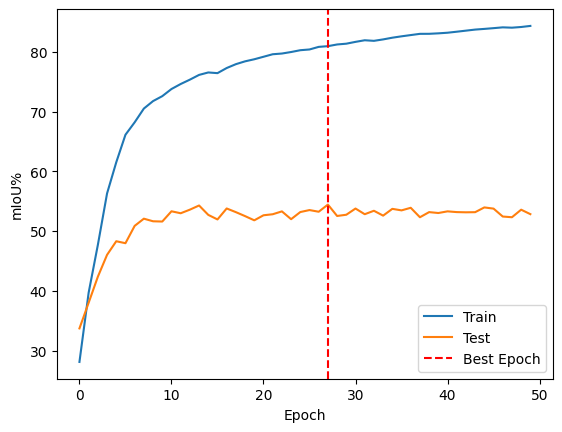

In [9]:
#Testing Real-Time semantic segmentation network

#Set up the model with the pretrained weights
BiSeNet_model = BiSeNet(num_classes=19, context_path='resnet18').to(device)

#Set up the loss function and the optimizer for BiSeNet
BiSeNet_criterion = torch.nn.CrossEntropyLoss(ignore_index=255)
BiSeNet_optimizer = torch.optim.SGD(BiSeNet_model.parameters(), lr=2.5e-2, momentum=0.9, weight_decay=1e-4)

#Test latency and FPS
#print(test_latency_FPS(BiSeNet_model, device, cityscapes_height, cityscapes_width))

#Test FLOPs and number of parameters
#print(test_FLOPs_params(BiSeNet_model, device, cityscapes_height, cityscapes_width))

#Train the model
all_train_miou, all_test_miou, best_epoch = train_model(BiSeNet_model, BiSeNet_criterion, BiSeNet_optimizer,
            cityscapes_train_dataloader, cityscapes_test_dataloader, class_names, device, n_epochs, model_name='BiSeNet')

plot_miou_over_epochs(all_train_miou, all_test_miou, best_epoch, model_name='BiSeNet')